In [1]:
import pandas as pd
bcn = pd.read_csv("../data/listings.csv")
lisboa = pd.read_csv("../data/listings-2.csv")


In [2]:
len(bcn), len(lisboa)

(19410, 25449)

In [3]:
bcn.columns, lisboa.columns

(Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
        'minimum_nights', 'number_of_reviews', 'last_review',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365', 'number_of_reviews_ltm', 'license'],
       dtype='object'),
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
        'minimum_nights', 'number_of_reviews', 'last_review',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365', 'number_of_reviews_ltm', 'license'],
       dtype='object'))

In [4]:
cols = ['id', 'host_id', 'host_name', 'neighbourhood', 'room_type', 'price', 'calculated_host_listings_count']

bcn_small = bcn[cols].copy()
lisboa_small = lisboa[cols].copy()

bcn_small.head(), lisboa_small.head()


(      id  host_id       host_name                       neighbourhood  \
 0  18674    71615          Mireia                  la Sagrada Família   
 1  23197    90417  Etain (Marnie)               el Besòs i el Maresme   
 2  32711   135703            Nick  el Camp d'en Grassot i Gràcia Nova   
 3  34241    73163          Andres                      el Barri Gòtic   
 4  34981    73163          Andres                      el Barri Gòtic   
 
          room_type  price  calculated_host_listings_count  
 0  Entire home/apt  210.0                              26  
 1  Entire home/apt  285.0                               1  
 2  Entire home/apt  170.0                               2  
 3  Entire home/apt  110.0                               3  
 4  Entire home/apt  333.0                               3  ,
       id  host_id  host_name      neighbourhood        room_type   price  \
 0   6499    14455      Bruno               Belm  Entire home/apt    87.0   
 1  25659   107347      Ellie  Sa

In [7]:
bcn_hosts = bcn_small['host_id'].value_counts()
lisboa_hosts = lisboa_small['host_id'].value_counts()

bcn_hosts.head(), lisboa_hosts.head()


(host_id
 346367515    514
 357946540    426
 1447144      413
 32037490     257
 221480824    244
 Name: count, dtype: int64,
 host_id
 447375630    391
 3953109      260
 505424337    225
 419162816    212
 76223539     180
 Name: count, dtype: int64)

In [6]:
total_bcn = len(bcn_small)
total_lisboa = len(lisboa_small)

top10_bcn = bcn_hosts.head(10).sum()
top10_lisboa = lisboa_hosts.head(10).sum()

pct_bcn = top10_bcn / total_bcn * 100
pct_lisboa = top10_lisboa / total_lisboa * 100

total_bcn, top10_bcn, pct_bcn, total_lisboa, top10_lisboa, pct_lisboa


(19410, 2775, 14.296754250386398, 25449, 1896, 7.450194506660379)

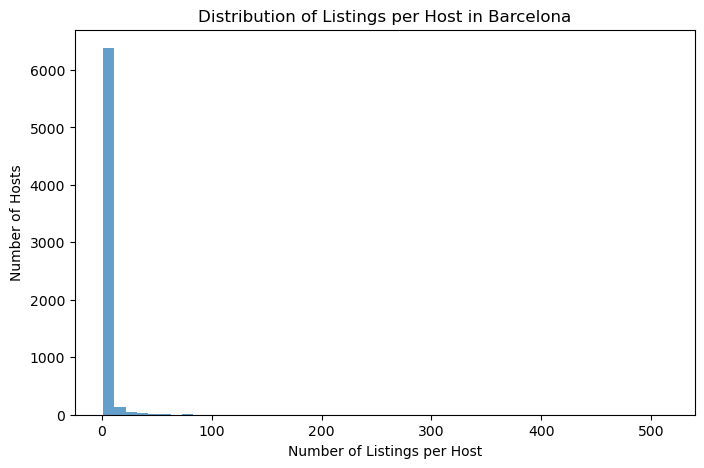

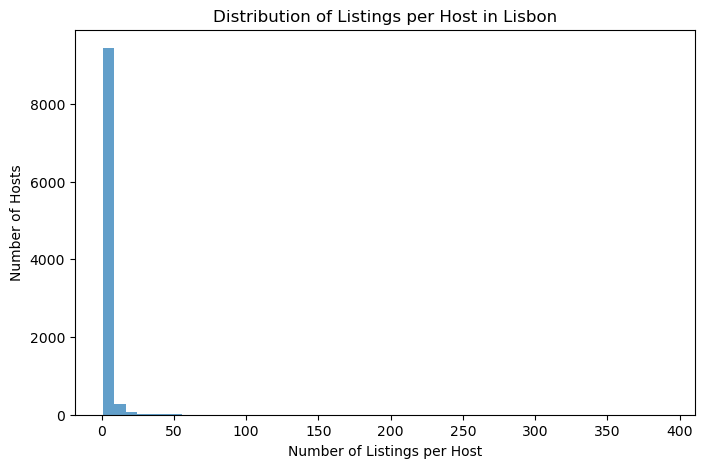

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(bcn_hosts, bins=50, alpha=0.7)
plt.title("Distribution of Listings per Host in Barcelona")
plt.xlabel("Number of Listings per Host")
plt.ylabel("Number of Hosts")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(lisboa_hosts, bins=50, alpha=0.7)
plt.title("Distribution of Listings per Host in Lisbon")
plt.xlabel("Number of Listings per Host")
plt.ylabel("Number of Hosts")
plt.show()




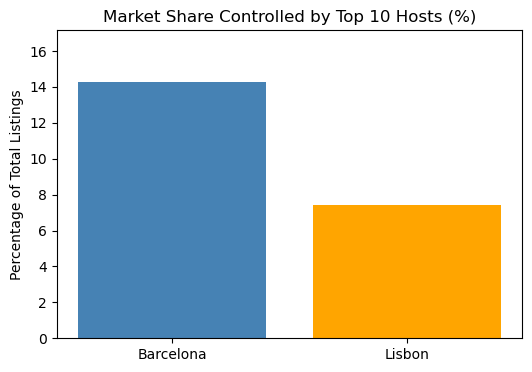

In [12]:
import matplotlib.pyplot as plt

cities = ['Barcelona', 'Lisbon']
pct_values = [pct_bcn, pct_lisboa]

plt.figure(figsize=(6,4))
plt.bar(cities, pct_values, color=['steelblue', 'orange'])
plt.title("Market Share Controlled by Top 10 Hosts (%)")
plt.ylabel("Percentage of Total Listings")
plt.ylim(0, max(pct_values)*1.2)
plt.show()


In [15]:
bcn_small['price'].sort_values(ascending=False).head(10), \
lisboa_small['price'].sort_values(ascending=False).head(10)


(15467    10000.0
 10947     9999.0
 14368     9715.0
 8713      9500.0
 10817     9286.0
 12958     9059.0
 12957     9059.0
 12956     9059.0
 12955     9059.0
 18140     9000.0
 Name: price, dtype: float64,
 16280    86733.0
 11815    65156.0
 15577    50000.0
 20103    40016.0
 15705    40008.0
 20104    40008.0
 15678    40008.0
 15706    40008.0
 16394    40004.0
 22593    40004.0
 Name: price, dtype: float64)

In [18]:
#I filtered out prices above 2,000 EUR to remove unrealistic outliers and keep only meaningful values.
bcn_clean = bcn_small[bcn_small['price'] < 2000].copy()
lisboa_clean = lisboa_small[lisboa_small['price'] < 2000].copy()

bcn_clean['price'].describe(), lisboa_clean['price'].describe()


(count    15213.000000
 mean       169.900809
 std        170.747835
 min          9.000000
 25%         69.000000
 50%        130.000000
 75%        213.000000
 max       1995.000000
 Name: price, dtype: float64,
 count    21726.000000
 mean       144.465157
 std        138.133959
 min          9.000000
 25%         75.000000
 50%        110.000000
 75%        165.000000
 max       1933.000000
 Name: price, dtype: float64)

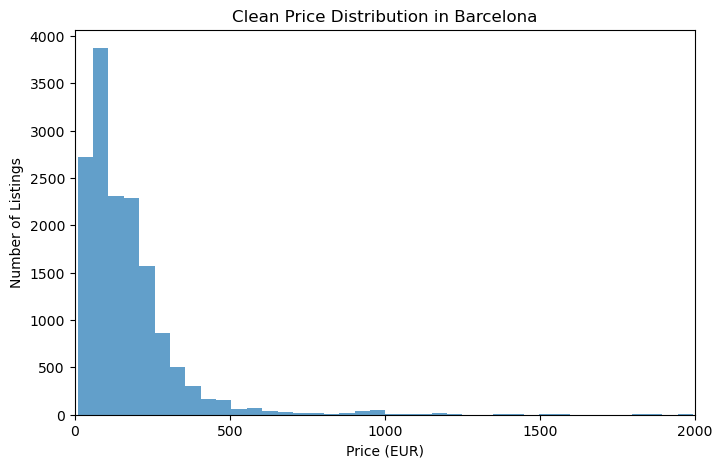

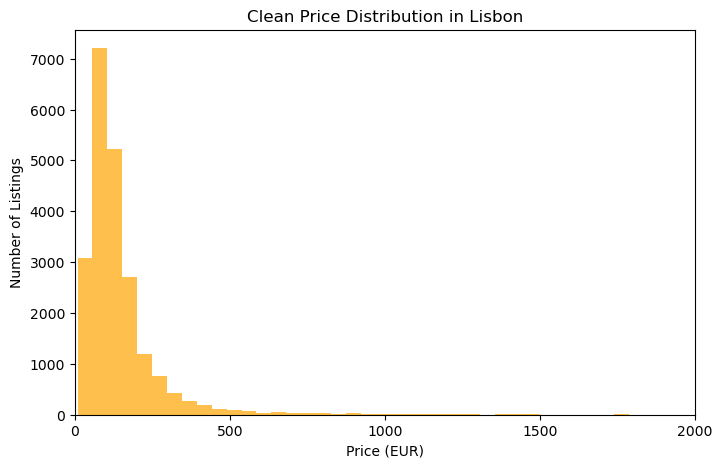

In [21]:
plt.figure(figsize=(8,5))
plt.hist(bcn_clean['price'], bins=40, alpha=0.7)
plt.title("Clean Price Distribution in Barcelona")
plt.xlabel("Price (EUR)")
plt.ylabel("Number of Listings")
plt.xlim(0, 2000)
plt.xticks(range(0, 2001, 500))
plt.show()

plt.figure(figsize=(8,5))
plt.hist(lisboa_clean['price'], bins=40, alpha=0.7, color='orange')
plt.title("Clean Price Distribution in Lisbon")
plt.xlabel("Price (EUR)")
plt.ylabel("Number of Listings")
plt.xlim(0, 2000)
plt.xticks(range(0, 2001, 500))
plt.show()


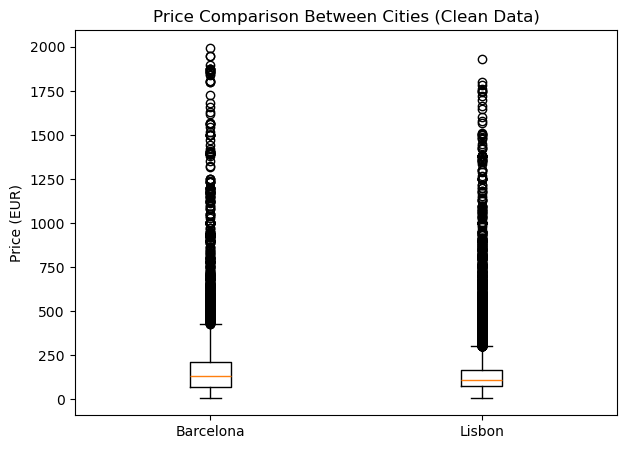

In [20]:
plt.figure(figsize=(7,5))
plt.boxplot([bcn_clean['price'], lisboa_clean['price']], labels=['Barcelona', 'Lisbon'])
plt.title("Price Comparison Between Cities (Clean Data)")
plt.ylabel("Price (EUR)")
plt.show()


1. Market concentration

The market structure differs notably between the two cities.
In Barcelona, the top 10 hosts control 14.3% of all listings, while in Lisbon the top 10 hosts control only 7.45%.
This indicates that Barcelona has a significantly more concentrated host market, with large multi-listing operators playing a more dominant role.
The distribution of listings per host confirms this pattern: Barcelona exhibits a longer right tail, with several hosts managing more than 300 listings, compared to fewer high-scale operators in Lisbon.

2. Price comparison

After filtering unrealistic outliers by keeping only listings priced below 2,000 EUR, meaningful differences emerge.
Barcelona shows a higher median price (130 EUR) compared to Lisbon (110 EUR), and the mean is also higher (170 EUR vs 144 EUR).
The boxplot comparison illustrates that Barcelona is overall more expensive, with both the central tendency and the upper quartile above those of Lisbon.

3. Distribution of prices

Histograms reveal that both cities have highly right-skewed price distributions: most listings fall between 50 and 200 EUR, but Barcelona has a wider spread and a greater number of high-priced listings.
Lisbon’s distribution is narrower, suggesting a more homogeneous market.

4. Summary

Overall, the analysis shows clear structural differences between the two cities:

Barcelona has a more concentrated host market, dominated by a small group of large operators.

Barcelona is also more expensive, with higher median and mean prices.

Lisbon displays a more competitive and less polarized market structure, with lower prices and fewer large-scale hosts.

These differences may reflect variations in tourism pressure, regulation, and market maturity between the two cities.